In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

USD_TO_SAR = 3.75
color_green = '#286140'
color_gold = '#b58500'
color_red = '#912f46' 

def save_and_show(filename):
    plt.tight_layout()
    # 1. Save FIRST
    plt.savefig(filename)
    print(f"   [Output] Chart saved as: {filename}")
    # 2. Then Show (optional, if running in a notebook)
    plt.show()
    # 3. Close to clear memory for the next plot
    plt.close()

>>> STEP 8: ANALYZING COST OF AGING & PROGRESSION...
   [Output] Chart saved as: Chart_1_Age_Escalation.png


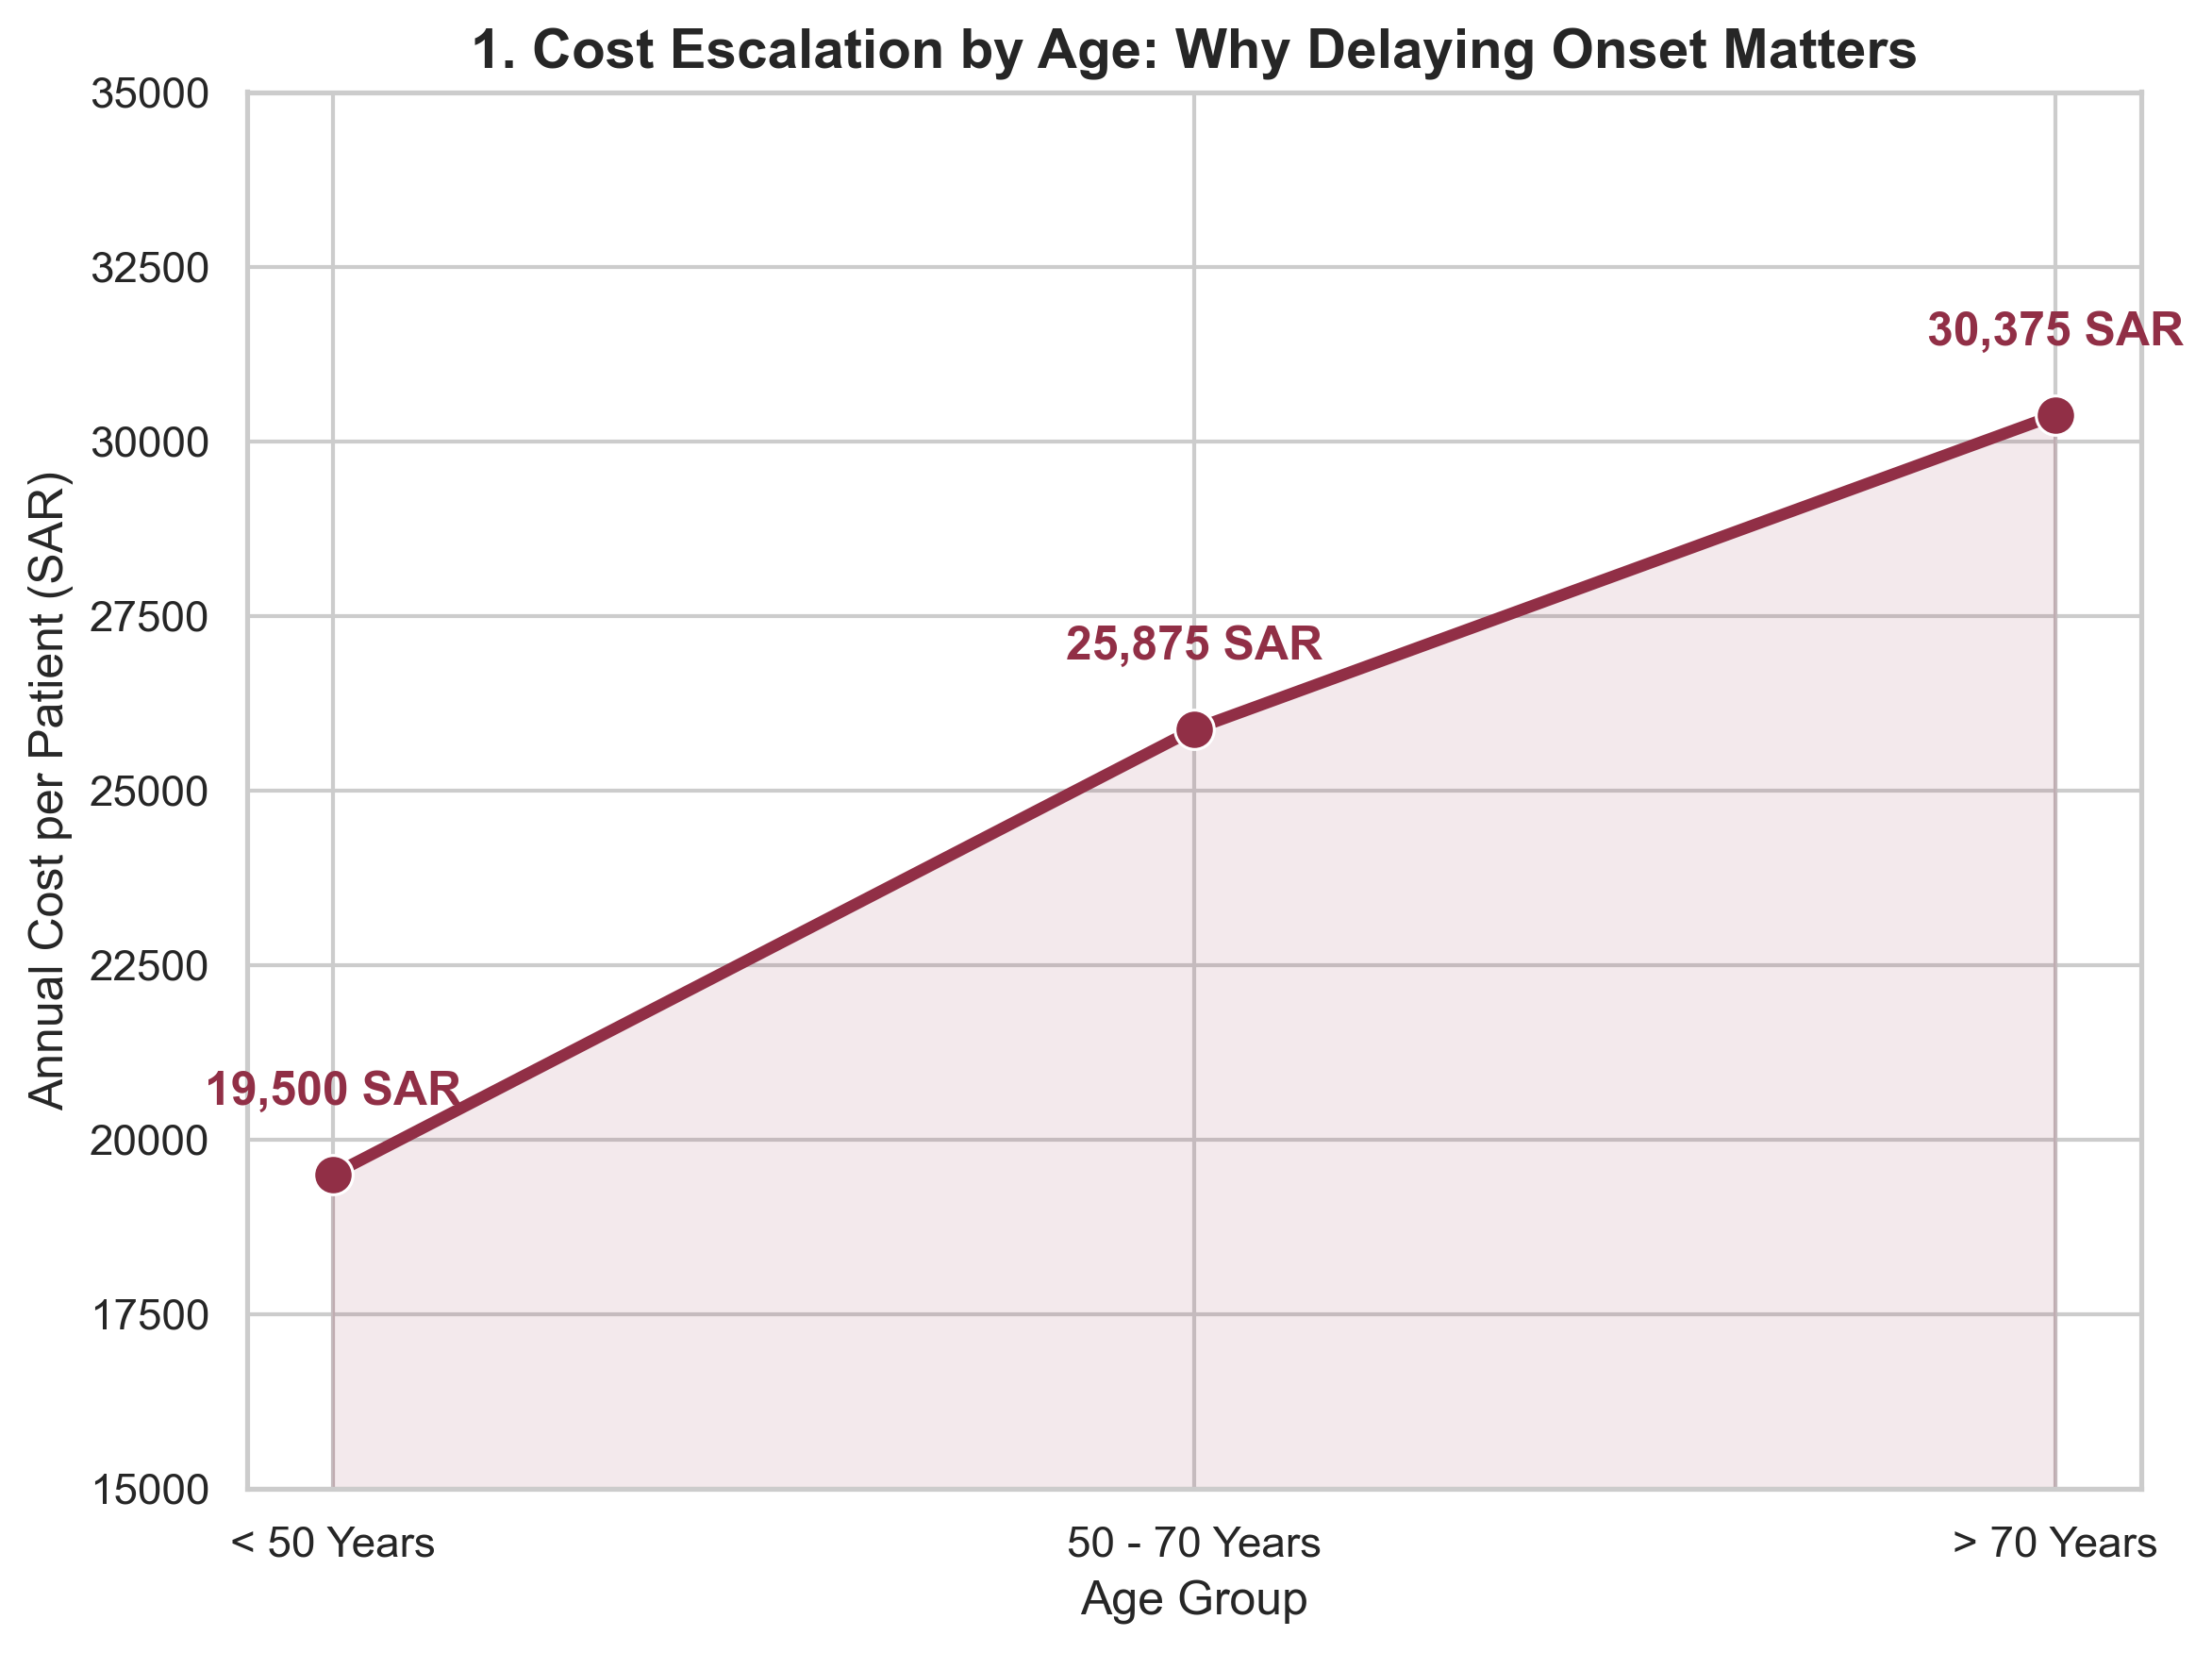

C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_22660\22198221.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df_lifetime, x='Patient Profile', y='Lifetime_Cost_SAR', palette=colors_life)


   [Output] Chart saved as: Chart_2_Lifetime_Liability.png


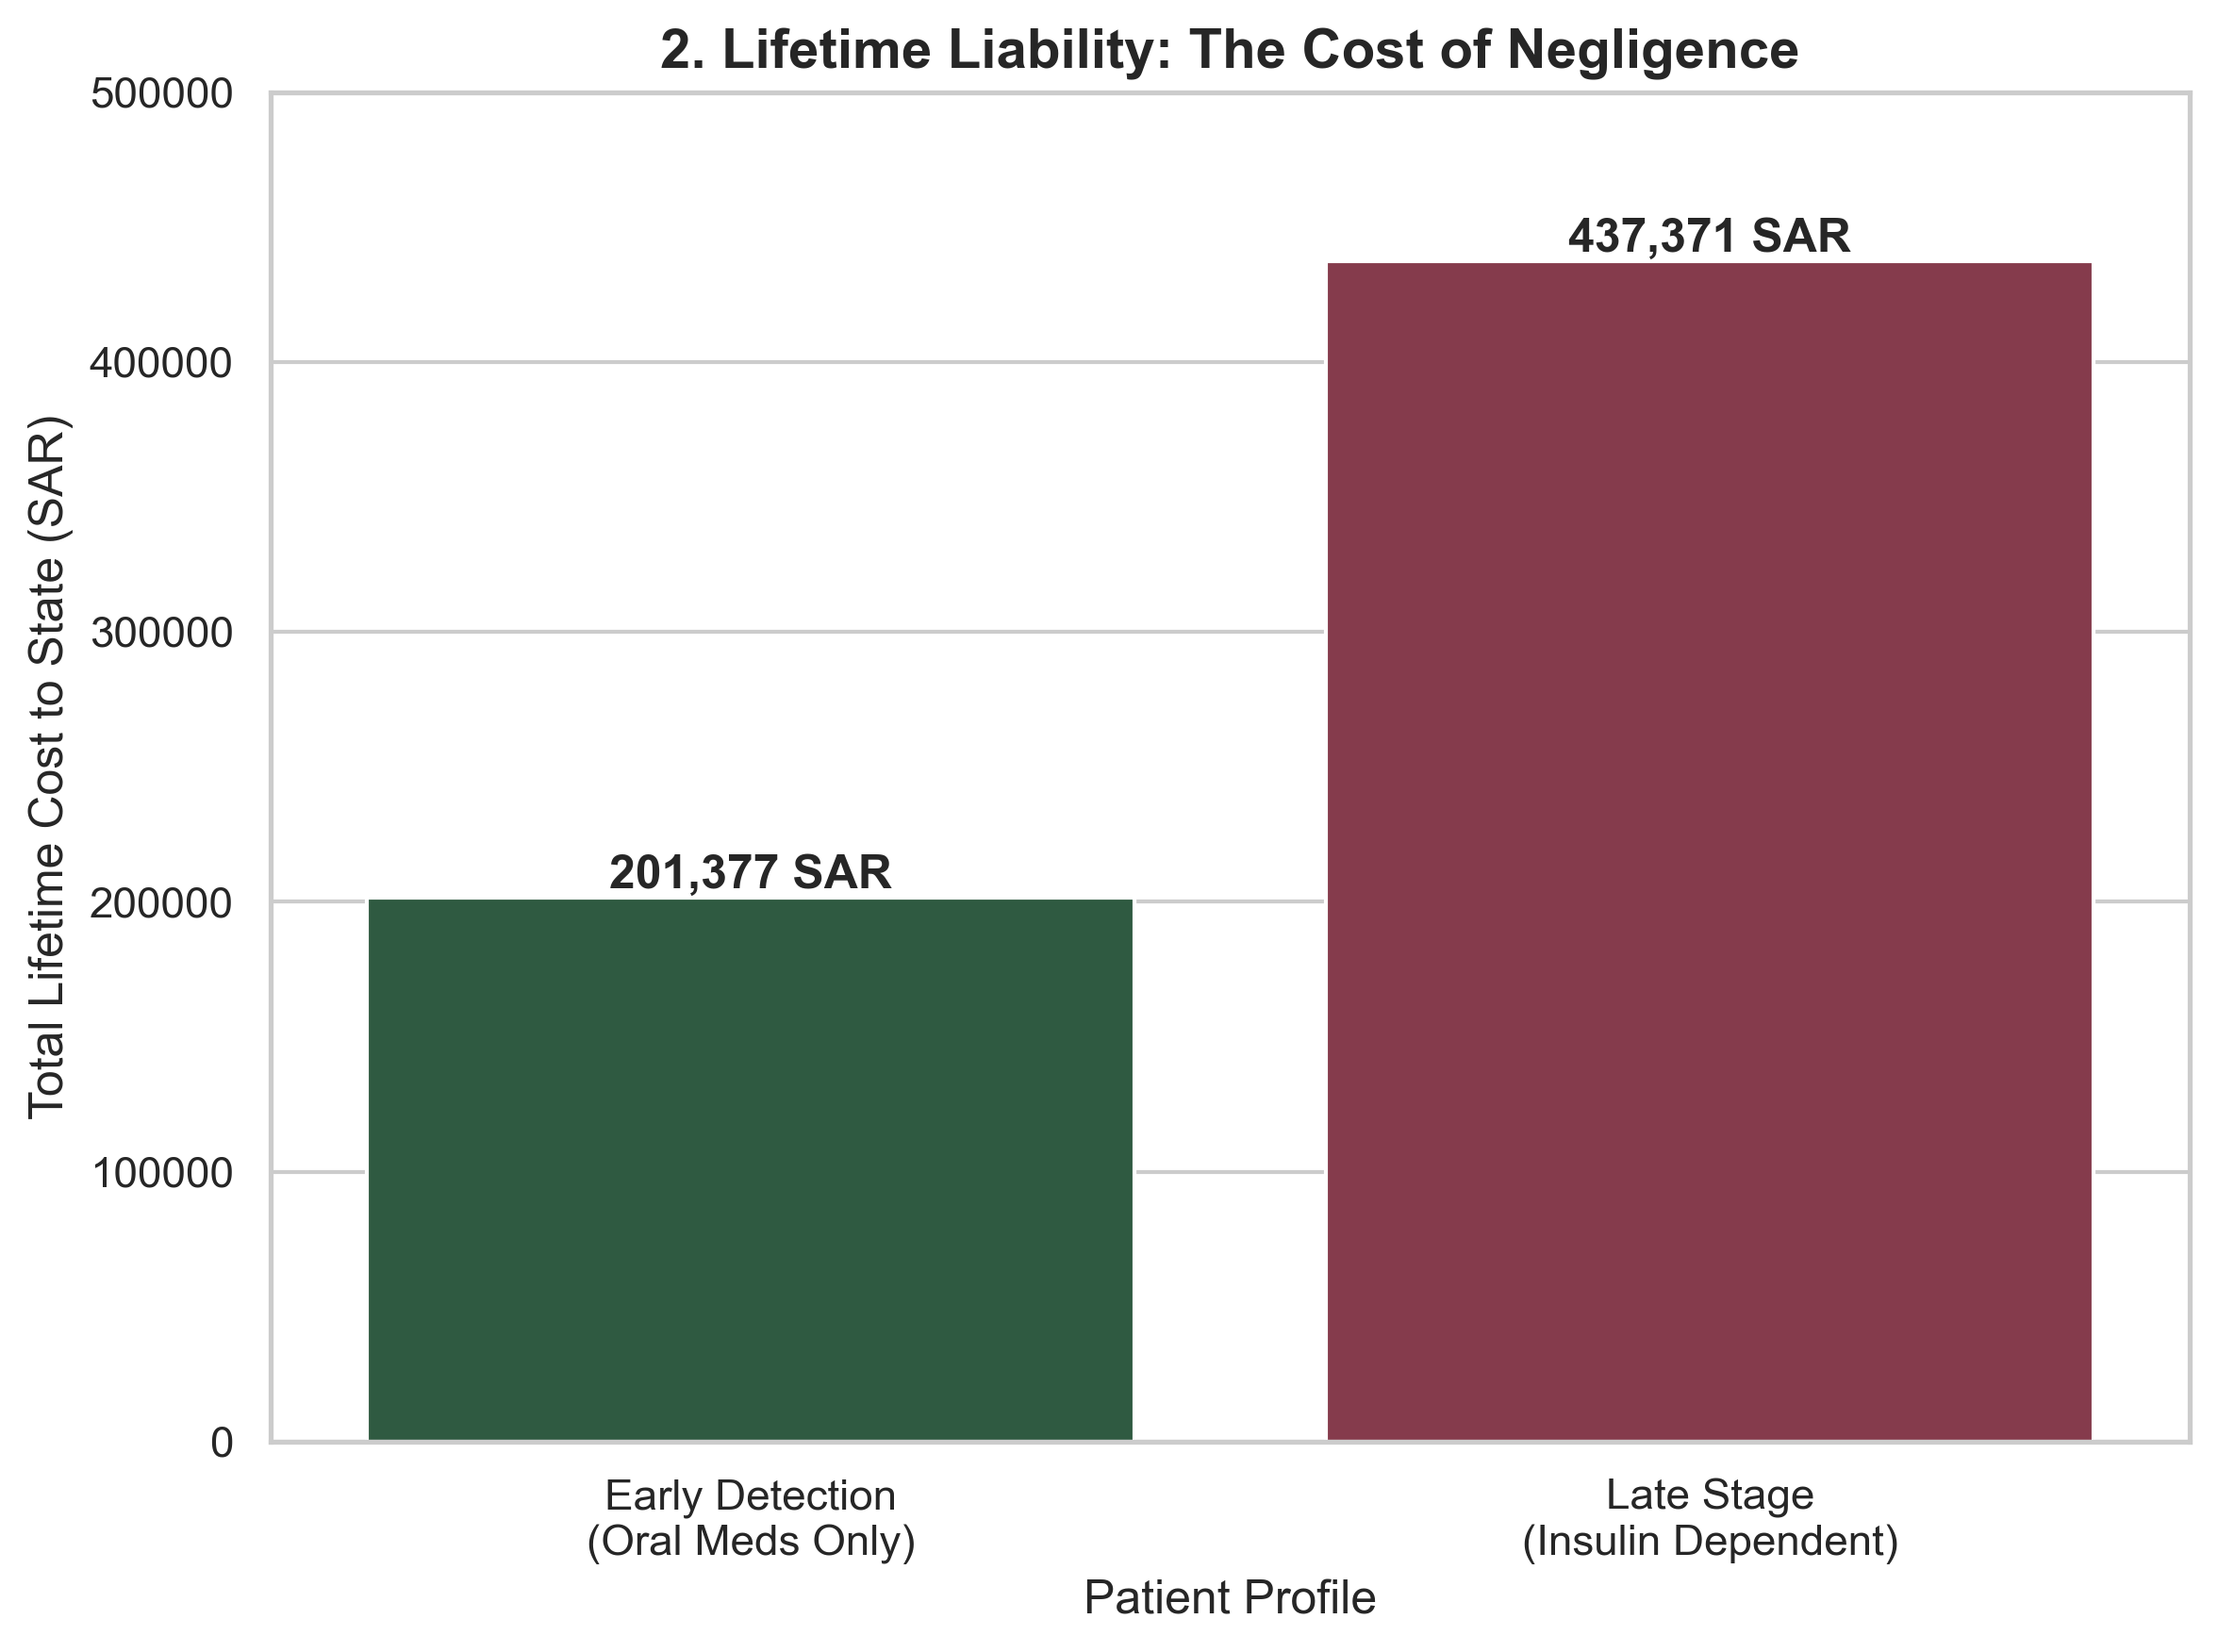

In [ ]:
print(">>> STEP 8: ANALYZING COST OF AGING & PROGRESSION...")

# --- DATA PREPARATION ---
# 1. Age Data
age_data = {
    'Age Group': ['< 50 Years', '50 - 70 Years', '> 70 Years'],
    'Cost_USD': [5200, 6900, 8100]
}
df_age = pd.DataFrame(age_data)
df_age['Cost_SAR'] = df_age['Cost_USD'] * USD_TO_SAR

# 2. Lifetime Data
lifetime_data = {
    'Patient Profile': ['Early Detection\n(Oral Meds Only)', 'Late Stage\n(Insulin Dependent)'],
    'Lifetime_Cost_SAR': [201377, 437371]
}
df_lifetime = pd.DataFrame(lifetime_data)


# ==========================================
# CHART 1: Age Escalation (Line Plot)
# ==========================================
plt.figure(figsize=(8, 6)) # Individual figure size

ax1 = sns.lineplot(data=df_age, x='Age Group', y='Cost_SAR', marker='o', markersize=10, linewidth=3, color=color_red)
plt.fill_between(df_age['Age Group'], df_age['Cost_SAR'], color=color_red, alpha=0.1)

plt.title('1. Cost Escalation by Age: Why Delaying Onset Matters', fontsize=14, fontweight='bold')
plt.ylabel('Annual Cost per Patient (SAR)')
plt.ylim(15000, 35000)

# Add annotations
for i, txt in enumerate(df_age['Cost_SAR']):
    plt.text(i, txt + 1000, f"{txt:,.0f} SAR", ha='center', fontweight='bold', color=color_red)

# Save the first chart
save_and_show("Chart_1_Age_Escalation.png")


# ==========================================
# CHART 2: Lifetime Liability (Bar Plot)
# ==========================================
plt.figure(figsize=(8, 6)) # Individual figure size

colors_life = [color_green, color_red]
ax2 = sns.barplot(data=df_lifetime, x='Patient Profile', y='Lifetime_Cost_SAR', palette=colors_life)

plt.title('2. Lifetime Liability: The Cost of Negligence', fontsize=14, fontweight='bold')
plt.ylabel('Total Lifetime Cost to State (SAR)')
plt.ylim(0, 500000)

# Add annotations
for p in ax2.patches:
    plt.annotate(f'{p.get_height():,.0f} SAR', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold')

# Save the second chart


>>> STEP 9: ANALYZING DISEASE VELOCITY & FACILITY EFFICIENCY...


C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_15172\3541479519.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_facility, x='Facility Type', y='Cost_SAR', palette=colors_eff, ax=ax2)


   [Output] Chart saved as: Chart_3_Disease_Velocity.png


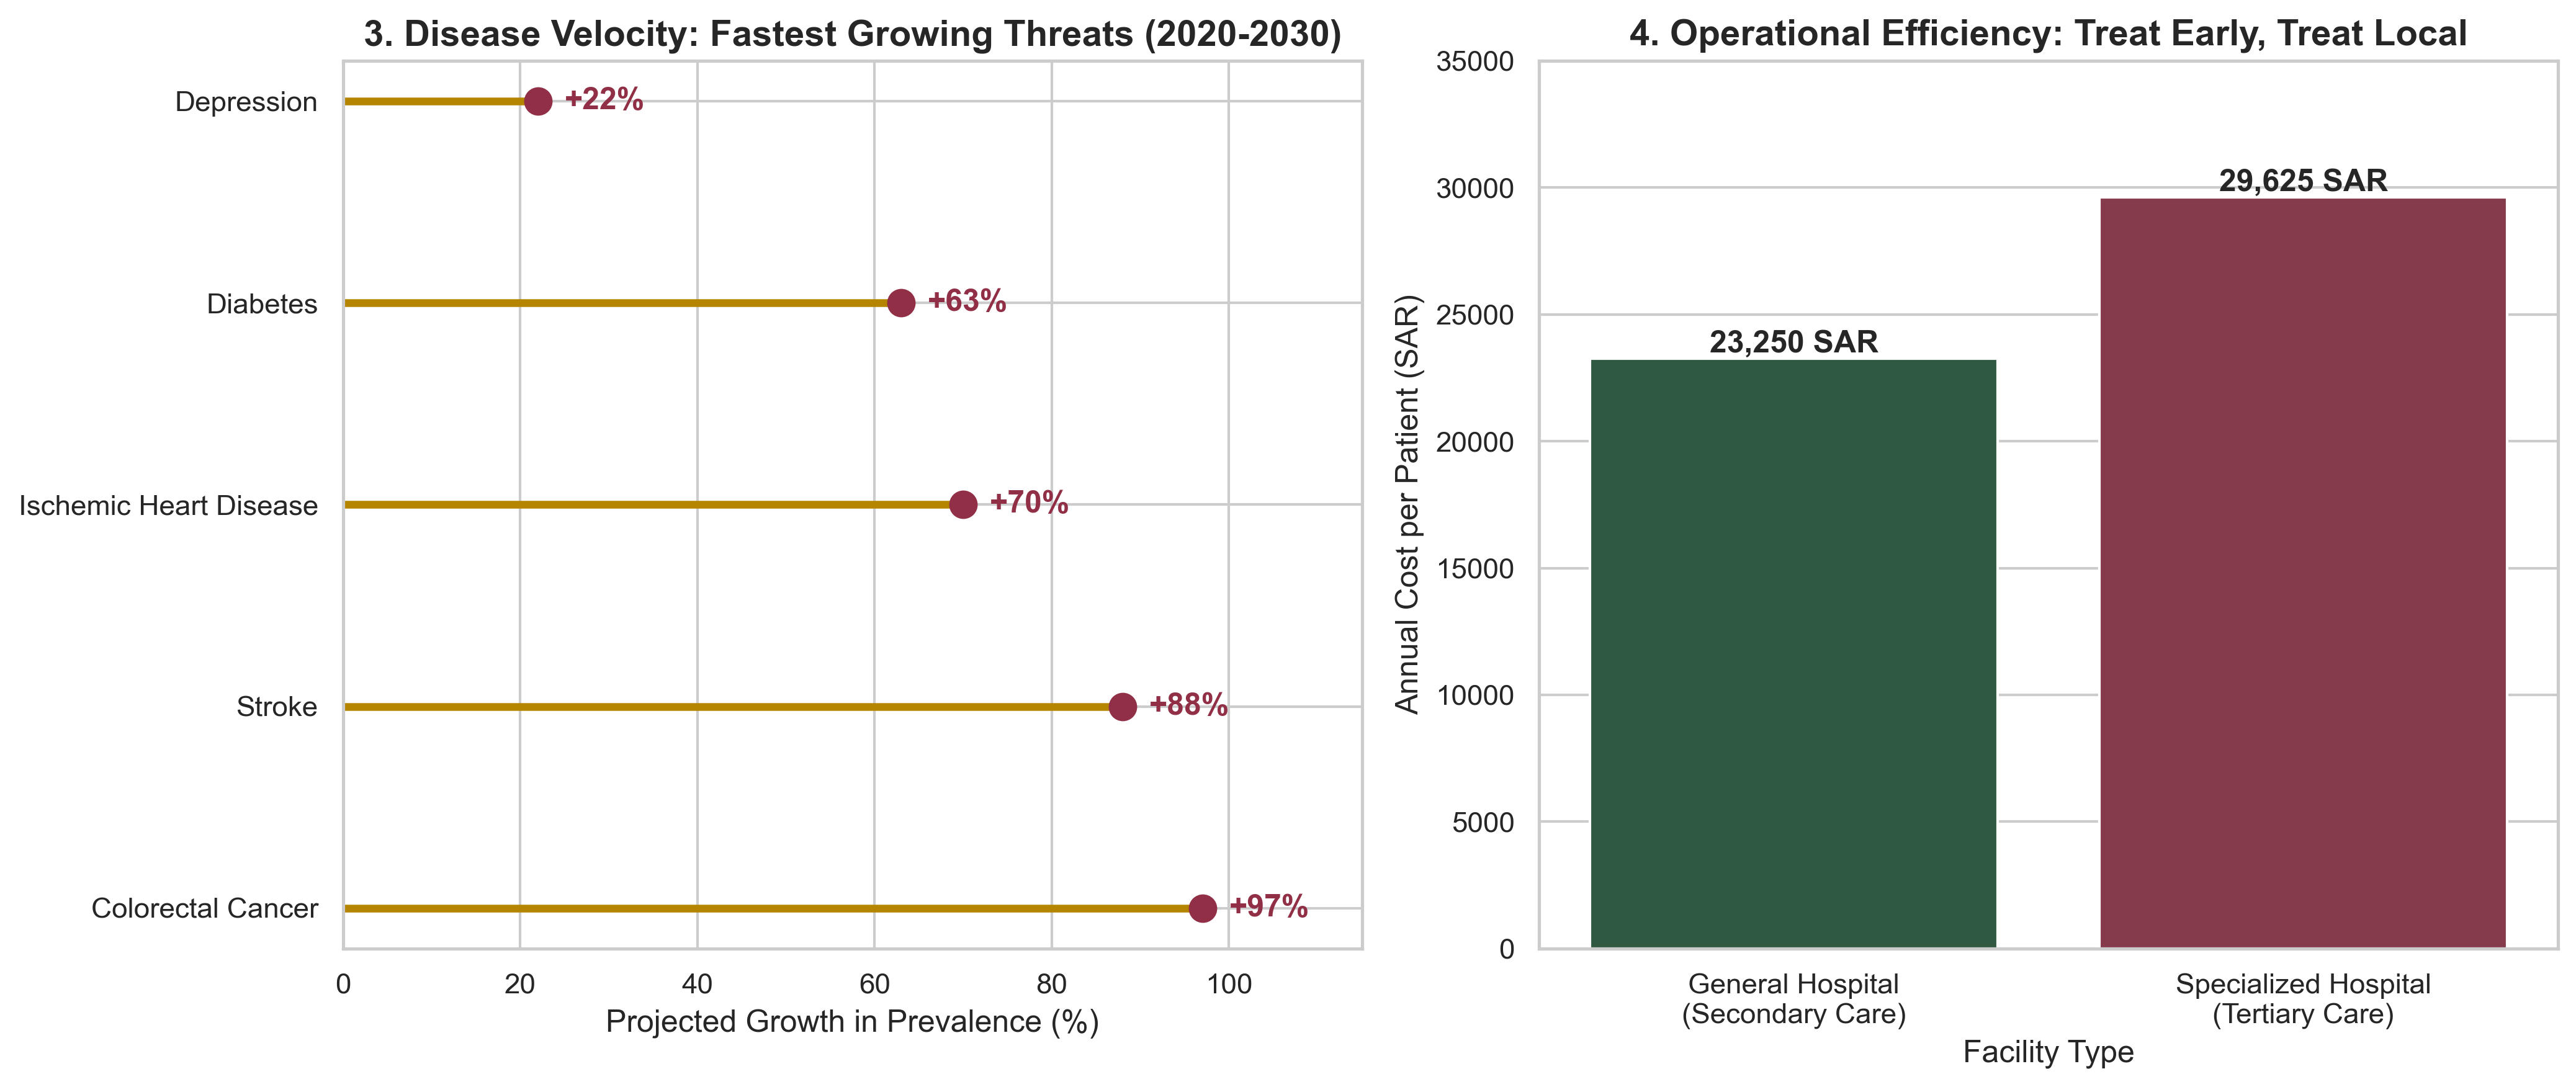

In [4]:
print(">>> STEP 9: ANALYZING DISEASE VELOCITY & FACILITY EFFICIENCY...")

# 1. بيانات النمو (Fastest Growing Threats)
growth_data = {
    'Disease': ['Colorectal Cancer', 'Stroke', 'Ischemic Heart Disease', 'Diabetes', 'Depression'],
    'Growth_Rate_2030': [97, 88, 70, 63, 22] 
}
df_growth = pd.DataFrame(growth_data).sort_values('Growth_Rate_2030', ascending=False)

# 2. بيانات الكفاءة (Source: Alshammari et al.)
facility_data = {
    'Facility Type': ['General Hospital\n(Secondary Care)', 'Specialized Hospital\n(Tertiary Care)'],
    'Cost_USD': [6200, 7900]
}
df_facility = pd.DataFrame(facility_data)
df_facility['Cost_SAR'] = df_facility['Cost_USD'] * USD_TO_SAR

efficiency_savings = df_facility.iloc[1]['Cost_SAR'] - df_facility.iloc[0]['Cost_SAR']
efficiency_pct = (efficiency_savings / df_facility.iloc[1]['Cost_SAR']) * 100

# الرسم البياني
fig9, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Disease Velocity (Gold Lines with Red Dots)
ax1.hlines(y=df_growth['Disease'], xmin=0, xmax=df_growth['Growth_Rate_2030'], color=color_gold, linewidth=3)
ax1.plot(df_growth['Growth_Rate_2030'], df_growth['Disease'], "o", markersize=10, color=color_red)

ax1.set_title('3. Disease Velocity: Fastest Growing Threats (2020-2030)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Projected Growth in Prevalence (%)')

for i, txt in enumerate(df_growth['Growth_Rate_2030']):
    ax1.text(txt + 3, i, f"+{txt}%", va='center', fontweight='bold', color=color_red)

ax1.set_xlim(0, 115) 

# Chart 2: Efficiency (Green vs Red)
colors_eff = [color_green, color_red] # أخضر (مستشفى عام) vs أحمر (تخصصي)
bars = sns.barplot(data=df_facility, x='Facility Type', y='Cost_SAR', palette=colors_eff, ax=ax2)

ax2.set_title('4. Operational Efficiency: Treat Early, Treat Local', fontsize=14, fontweight='bold')
ax2.set_ylabel('Annual Cost per Patient (SAR)')
ax2.set_ylim(0, 35000)

# سهم التوفير
start_h = df_facility.iloc[0]['Cost_SAR']
end_h = df_facility.iloc[1]['Cost_SAR']

for p in bars.patches:
    ax2.annotate(f'{p.get_height():,.0f} SAR', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=12, weight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15) 
save_and_show("Chart_3_Disease_Velocity.png")
plt.show()